We found an error with the way the new hospitalizations were being calculated, which was causing an increase in the stochastic effect on new_H over time.   
We fixed the error and re-ran the Particle Filter, and then plugged these new beta values into our Trend Forecast algorithm.

In [1]:
from src.hosp_forecast import main
from src.utils import paths
import os
import pandas as pd
import numpy as np

In [2]:
beta_forecast_path = os.path.join(
    paths.OUTPUT_DIR, "trend_forecast_20241023", "2023-10-28", "06", "b_t_fct_boot.csv"
)
forecasted_betas = pd.read_csv(beta_forecast_path)
forecast_betas = forecasted_betas.to_numpy()
forecast_betas = forecast_betas.T

In [3]:
forecast_betas[0].shape

(28,)

In [6]:
main.main(
    forecasted_betas=forecast_betas,
    location_code="06",
    reference_date="2023-10-28",
    use_nbinom=False,
)

Starting.
[3.9442704e+07 3.3467778e+03 9.1925156e+04 2.2502576e+02 2.0483959e+01]
Data loaded.
Number Bootstraps: 200
All Forecasts Shape: (200, 5, 28)


all_forecasts: (200, 28)


{4: array([170, 170, 171, 171, 172, 172, 172, 172, 172, 174, 174, 174, 174,
        175, 176, 176, 176, 176, 176, 178, 179, 179, 180]),
 3: array([159, 159, 159, 161, 161, 162, 163, 163, 163, 163, 163, 164, 164,
        164, 164, 164, 164, 165, 165, 165, 167, 167, 167]),
 2: array([150, 150, 151, 151, 151, 151, 151, 151, 152, 152, 152, 152, 152,
        153, 153, 153, 153, 153, 154, 154, 155, 155, 155]),
 1: array([121, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
        122, 122, 123, 123, 123, 123, 123, 123, 123, 123])}

In [7]:
forecast_file_path = os.path.join(
    paths.HOSP_OUTPUT_DIR, "2023-10-28", "06-PMCMC-flu-predictions.csv"
)
forecast_df = pd.read_csv(forecast_file_path)

In [8]:
forecast_df

,reference_date,horizon,target_end_date,location,output_type,output_type_id,value
0,2023-10-28,4,2023-11-04,6,quantile,0.010,170
1,2023-10-28,4,2023-11-04,6,quantile,0.025,170
2,2023-10-28,4,2023-11-04,6,quantile,0.050,171
3,2023-10-28,4,2023-11-04,6,quantile,0.100,171
4,2023-10-28,4,2023-11-04,6,quantile,0.150,172
...,...,...,...,...,...,...,...
87,2023-10-28,1,2023-11-25,6,quantile,0.850,123
88,2023-10-28,1,2023-11-25,6,quantile,0.900,123
89,2023-10-28,1,2023-11-25,6,quantile,0.950,123
90,2023-10-28,1,2023-11-25,6,quantile,0.975,123


In [9]:
target_dates = pd.read_csv("../datasets/target_dates.csv")

In [10]:
dates = target_dates.to_numpy()
dates[0][0]

'2023-10-14'

In [11]:
# Generate forecasts for all dates
# for the recent Trend Forecast test on Arizona
from src.hosp_forecast import main

for date in dates:
    date = date[0]
    beta_forecast_path = os.path.join(
        paths.OUTPUT_DIR, "trend_forecast_20241023", date, "06", "b_t_fct_boot.csv"
    )
    try:
        forecasted_betas = pd.read_csv(beta_forecast_path)
        forecast_betas = forecasted_betas.to_numpy()
        forecast_betas = forecast_betas.T
    except FileNotFoundError:
        continue

    main.main(
        forecasted_betas=forecast_betas,
        location_code="06",
        reference_date=date,
        use_nbinom=False,
    )

Starting.
[3.9442704e+07 3.3467778e+03 9.1925156e+04 2.2502576e+02 2.0483959e+01]
Data loaded.
Number Bootstraps: 200
All Forecasts Shape: (200, 5, 28)


all_forecasts: (200, 28)
Starting.
[3.9442704e+07 3.3467778e+03 9.1925156e+04 2.2502576e+02 2.0483959e+01]
Data loaded.
Number Bootstraps: 200
All Forecasts Shape: (200, 5, 28)


all_forecasts: (200, 28)
Starting.
[3.9442704e+07 3.3467778e+03 9.1925156e+04 2.2502576e+02 2.0483959e+01]
Data loaded.
Number Bootstraps: 200
All Forecasts Shape: (200, 5, 28)


all_forecasts: (200, 28)
Starting.
[3.9442704e+07 3.3467778e+03 9.1925156e+04 2.2502576e+02 2.0483959e+01]
Data loaded.
Number Bootstraps: 200
All Forecasts Shape: (200, 5, 28)


all_forecasts: (200, 28)
Starting.
[3.9442704e+07 3.3467778e+03 9.1925156e+04 2.2502576e+02 2.0483959e+01]
Data loaded.
Number Bootstraps: 200
All Forecasts Shape: (200, 5, 28)


all_forecasts: (200, 28)
Starting.
[3.9442704e+07 3.3467778e+03 9.1925156e+04 2.2502576e+02 2.0483959e+01]
Data loaded.
Number Boo

In [12]:
import os
import shutil

parent_folder = (
    paths.HOSP_OUTPUT_DIR
)  # The folder containing all the subfolders (dates)
output_folder = os.path.join(
    parent_folder, "test_predictions_20241006"
)  # Where all the renamed CSVs will be stored

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through each subfolder (which are named by date)
for subfolder in os.listdir(parent_folder):
    subfolder_path = os.path.join(parent_folder, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Find the CSV file in the subfolder
        for file in os.listdir(subfolder_path):
            if file.endswith(".csv"):
                csv_file_path = os.path.join(subfolder_path, file)

                # Rename the file with the subfolder's name (date)
                new_filename = f"{subfolder}-hosp-forecasts.csv"
                new_file_path = os.path.join(output_folder, new_filename)

                # Copy (or move) the file to the output folder with the new name
                shutil.copy(csv_file_path, new_file_path)
                print(f"Copied and renamed {csv_file_path} to {new_file_path}")

Copied and renamed /home/andrew/PycharmProjects/pmcmc_forecast/output/hosp_forecast/2023-10-28/06-PMCMC-flu-predictions.csv to /home/andrew/PycharmProjects/pmcmc_forecast/output/hosp_forecast/test_predictions_20241006/2023-10-28-hosp-forecasts.csv
Copied and renamed /home/andrew/PycharmProjects/pmcmc_forecast/output/hosp_forecast/2023-10-21/06-PMCMC-flu-predictions.csv to /home/andrew/PycharmProjects/pmcmc_forecast/output/hosp_forecast/test_predictions_20241006/2023-10-21-hosp-forecasts.csv
Copied and renamed /home/andrew/PycharmProjects/pmcmc_forecast/output/hosp_forecast/2023-11-04/06-PMCMC-flu-predictions.csv to /home/andrew/PycharmProjects/pmcmc_forecast/output/hosp_forecast/test_predictions_20241006/2023-11-04-hosp-forecasts.csv
Copied and renamed /home/andrew/PycharmProjects/pmcmc_forecast/output/hosp_forecast/2023-11-11/06-PMCMC-flu-predictions.csv to /home/andrew/PycharmProjects/pmcmc_forecast/output/hosp_forecast/test_predictions_20241006/2023-11-11-hosp-forecasts.csv
Copied a

/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

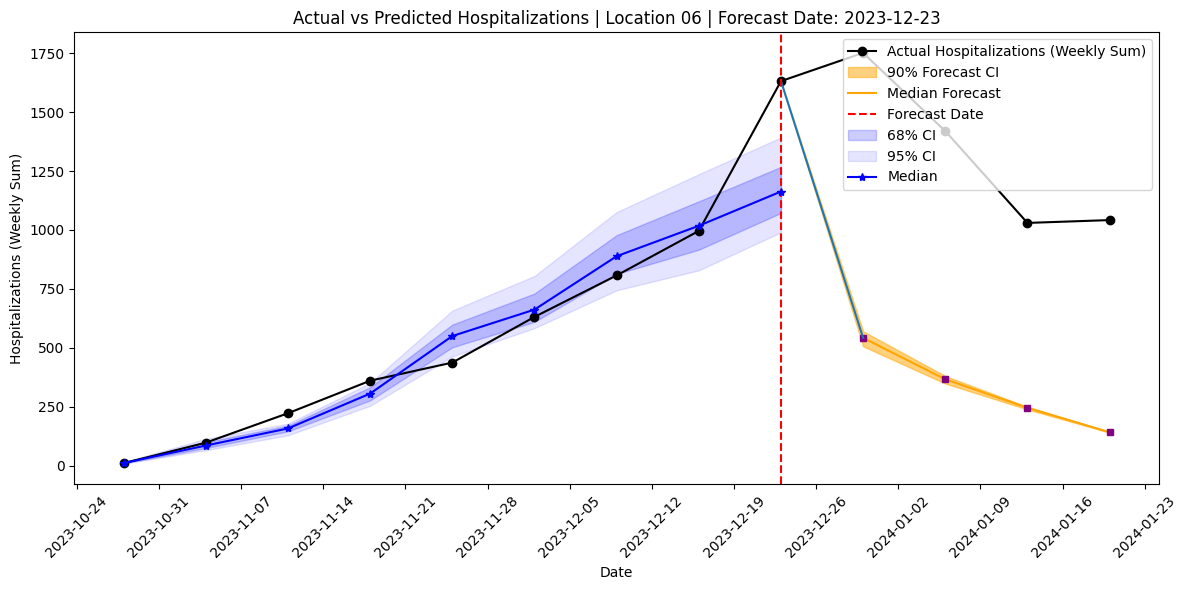

In [16]:
from src.utils.plotting import plot_predictions_with_quantile_range

plot_predictions_with_quantile_range(
    prediction_date="2023-12-23",
    location="06",
    hosp_est_file_name="mle_hosp_est_20241020.npy",
    weeks_prior=8,
    daily_resolution=False,
    pf_uncertainty=True,
    streamlit=False,
)

2023-10-28
2023-10-28


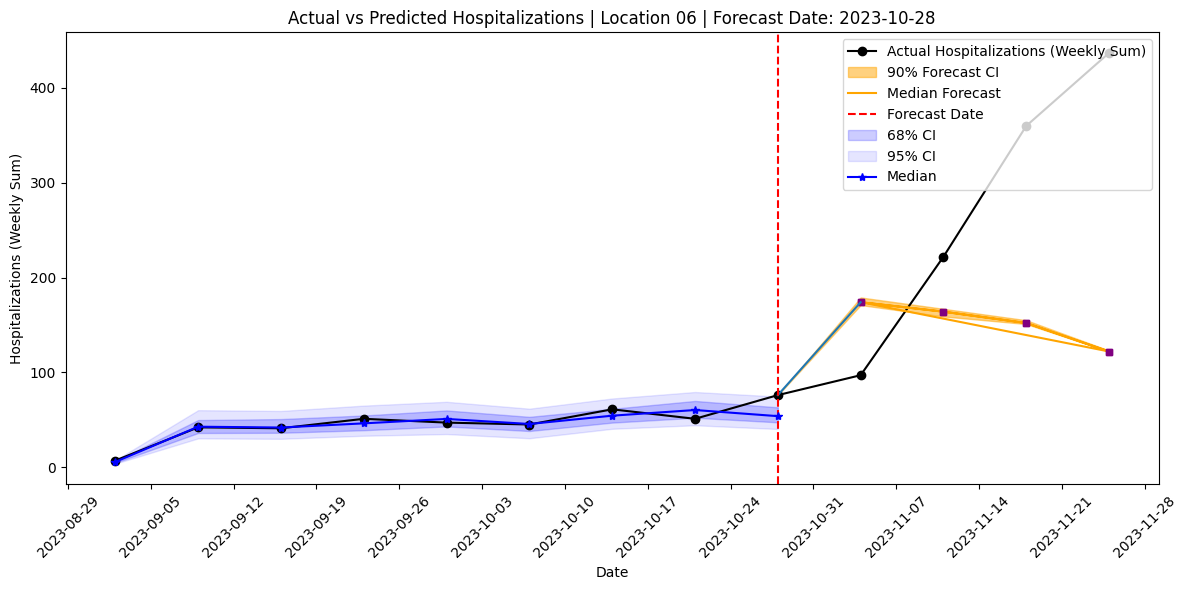

2023-10-21
2023-10-21


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

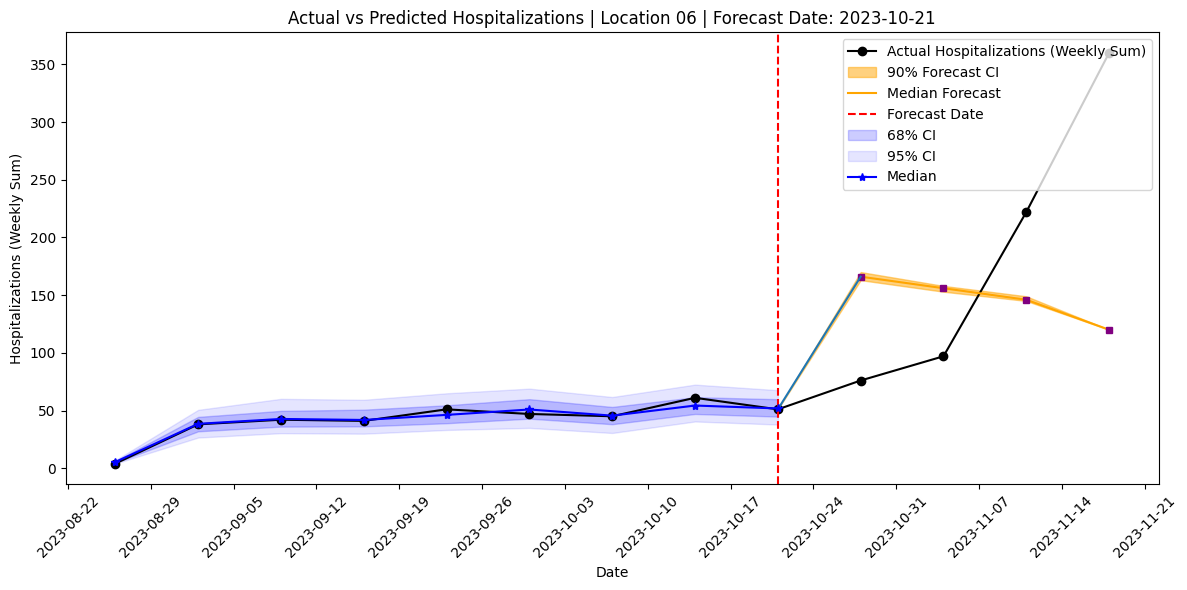

2023-11-04
2023-11-04


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

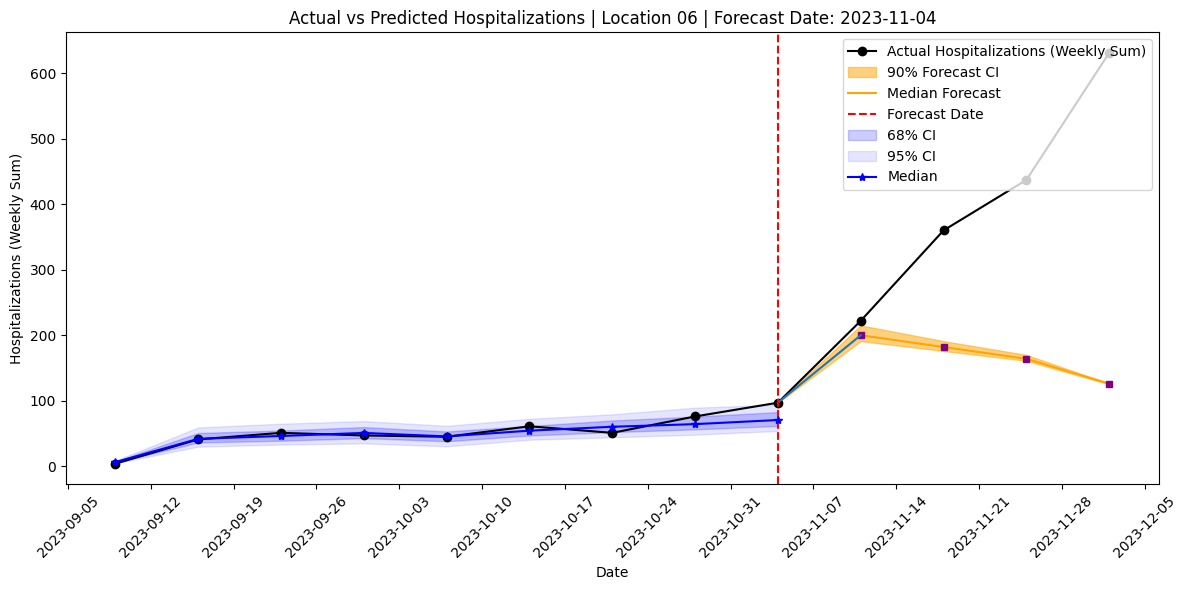

2023-11-11
2023-11-11


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

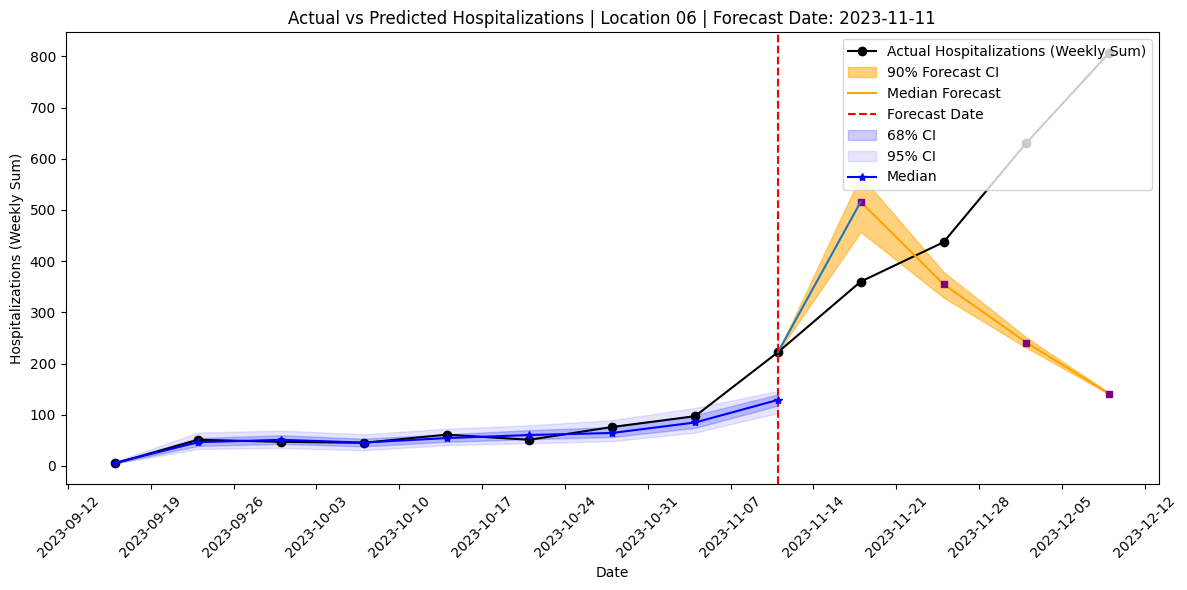

2023-11-25
2023-11-25


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

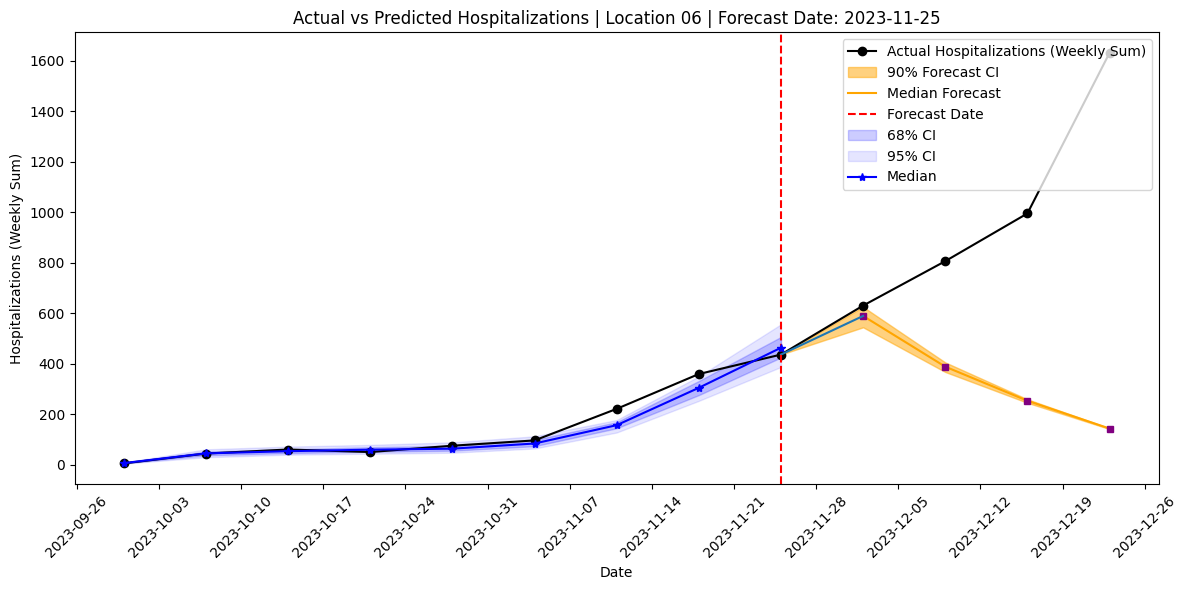

2023-12-16
2023-12-16


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

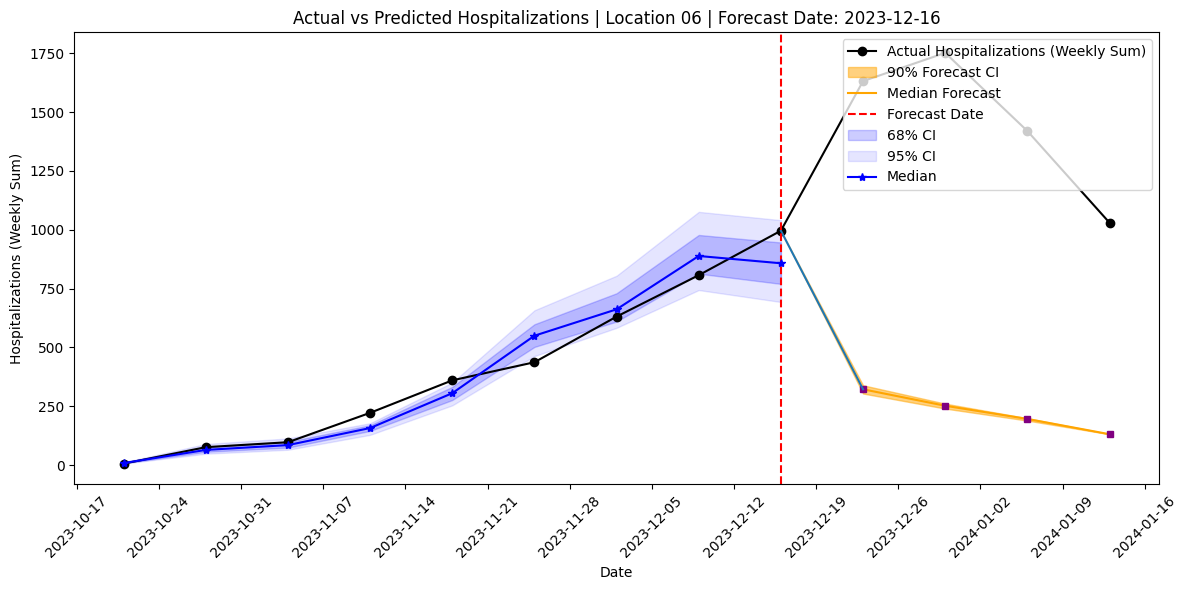

2023-12-23
2023-12-23


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

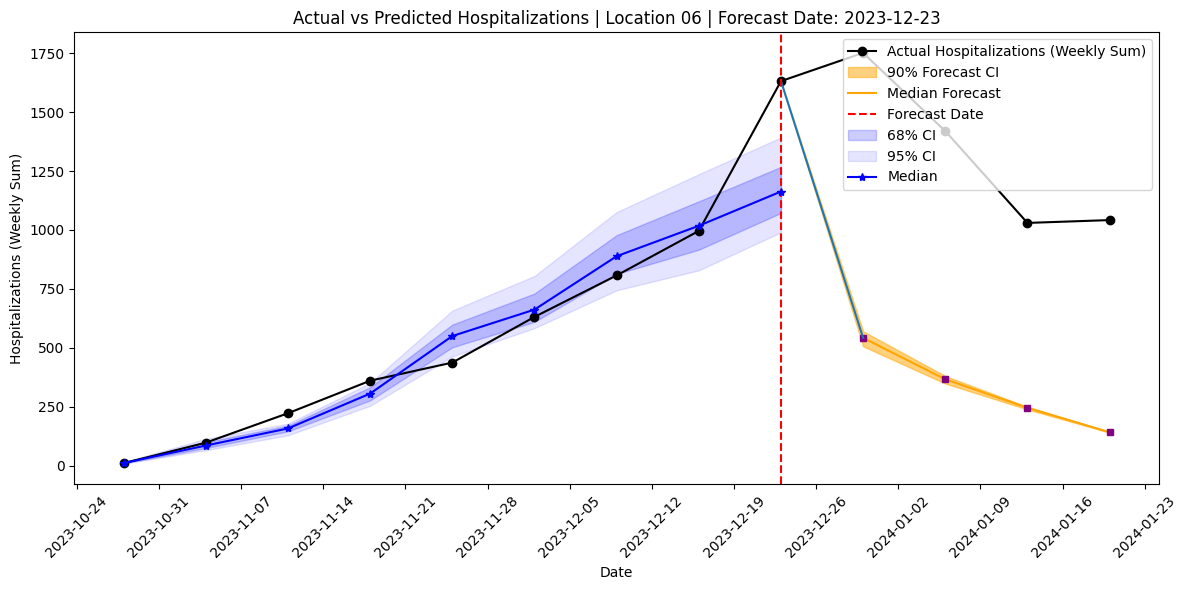

2023-12-30
2023-12-30


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

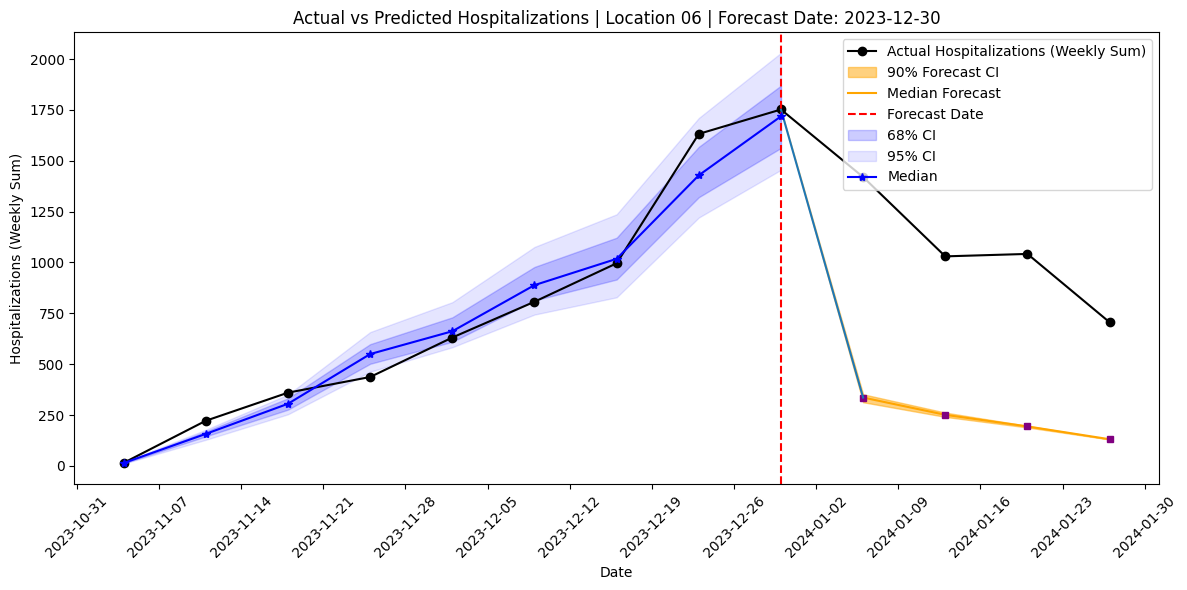

2024-01-06
2024-01-06


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

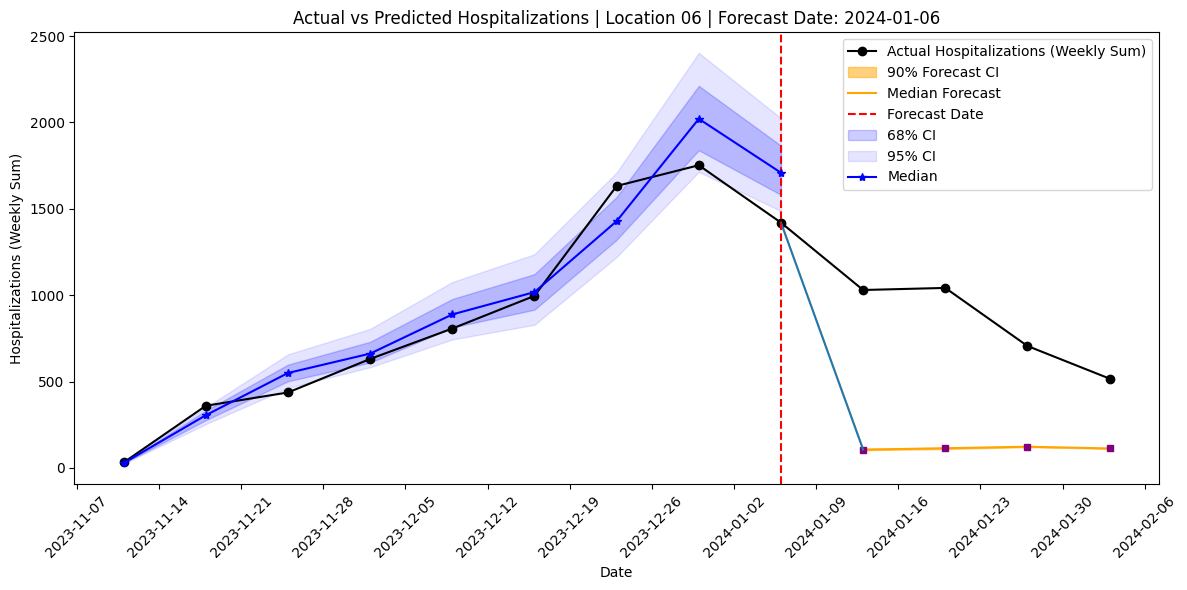

2024-01-13
2024-01-13


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

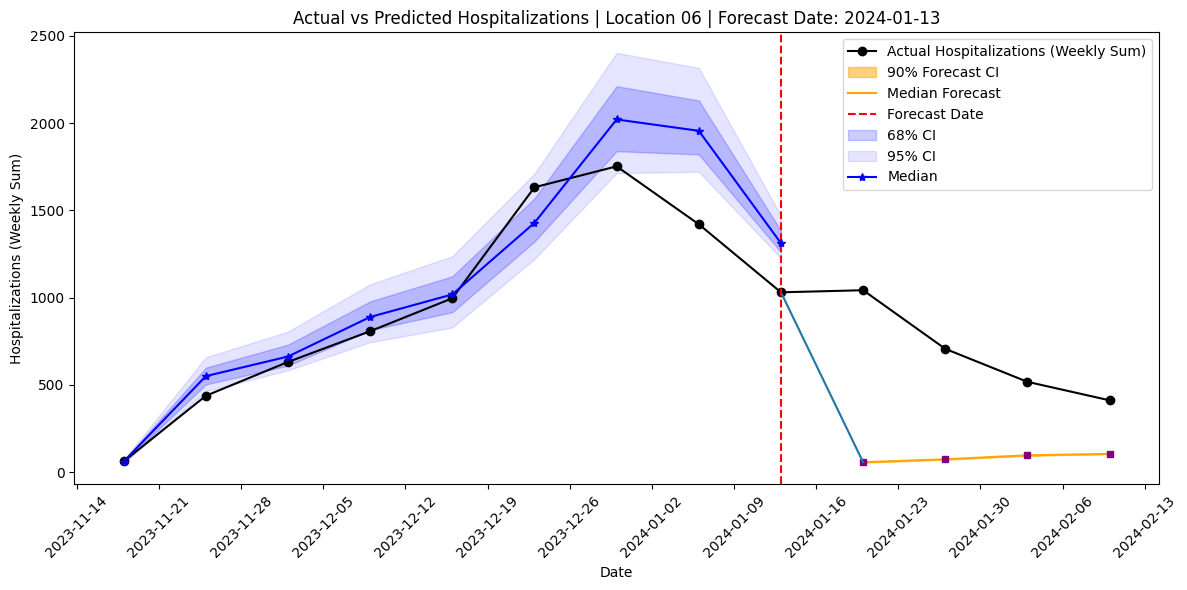

2024-01-20
2024-01-20


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

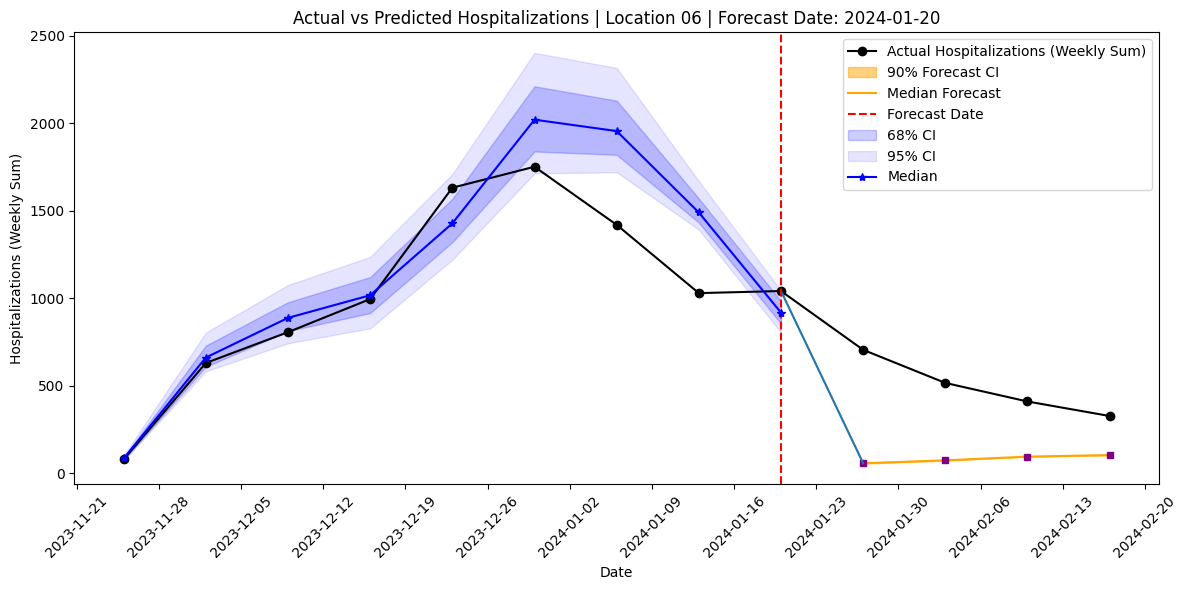

2024-02-24
2024-02-24


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

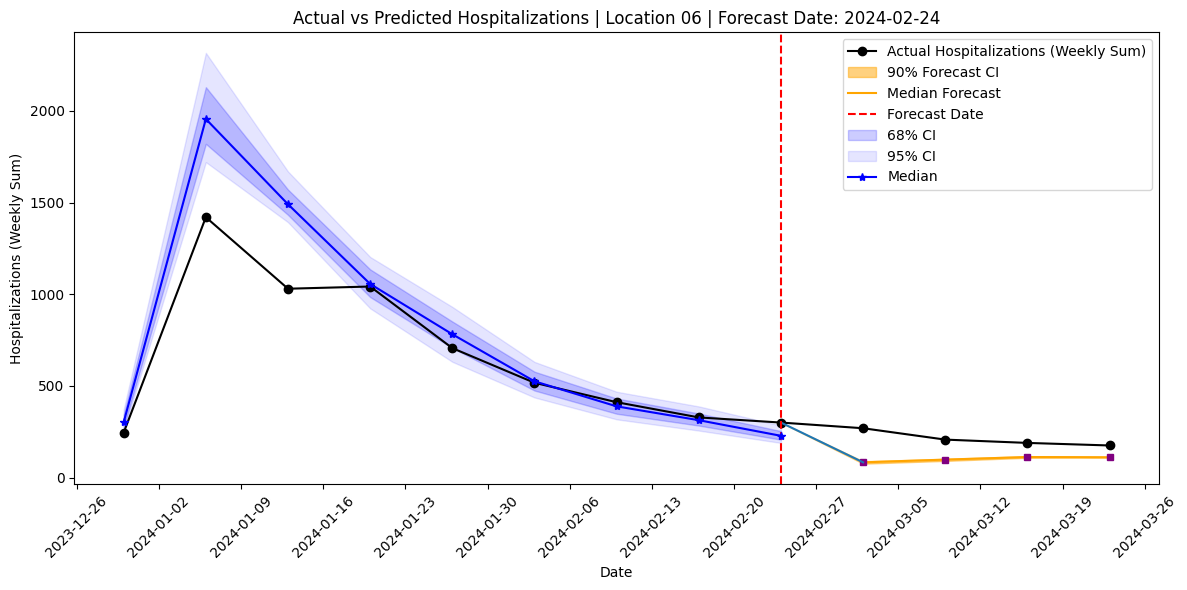

2024-03-02
2024-03-02


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

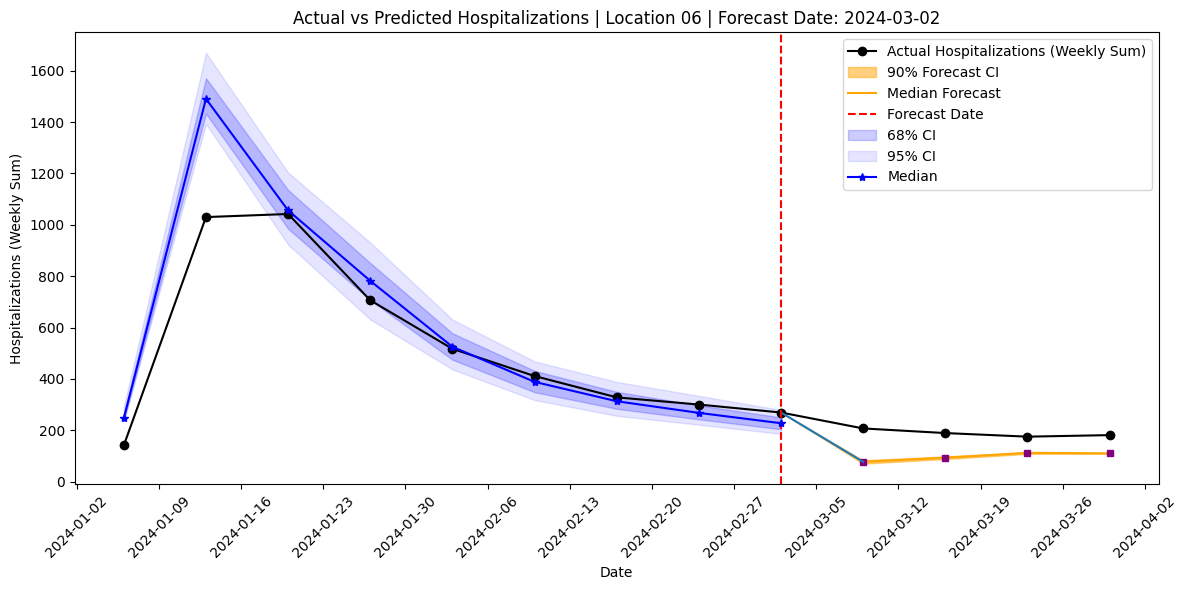

2024-03-09
2024-03-09


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

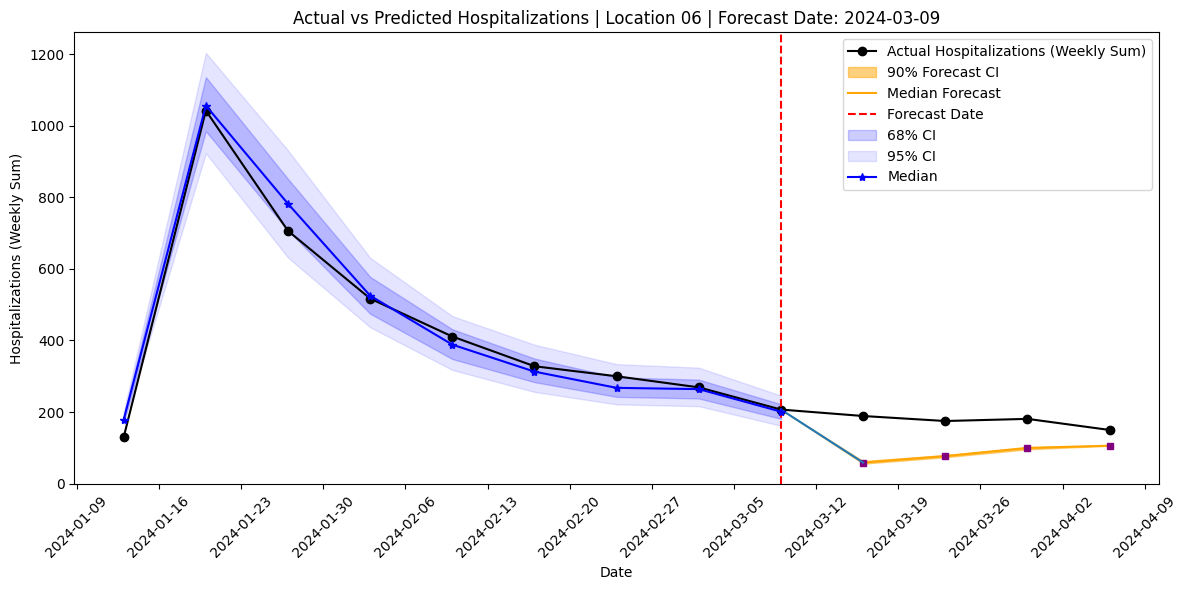

2024-03-16
2024-03-16


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

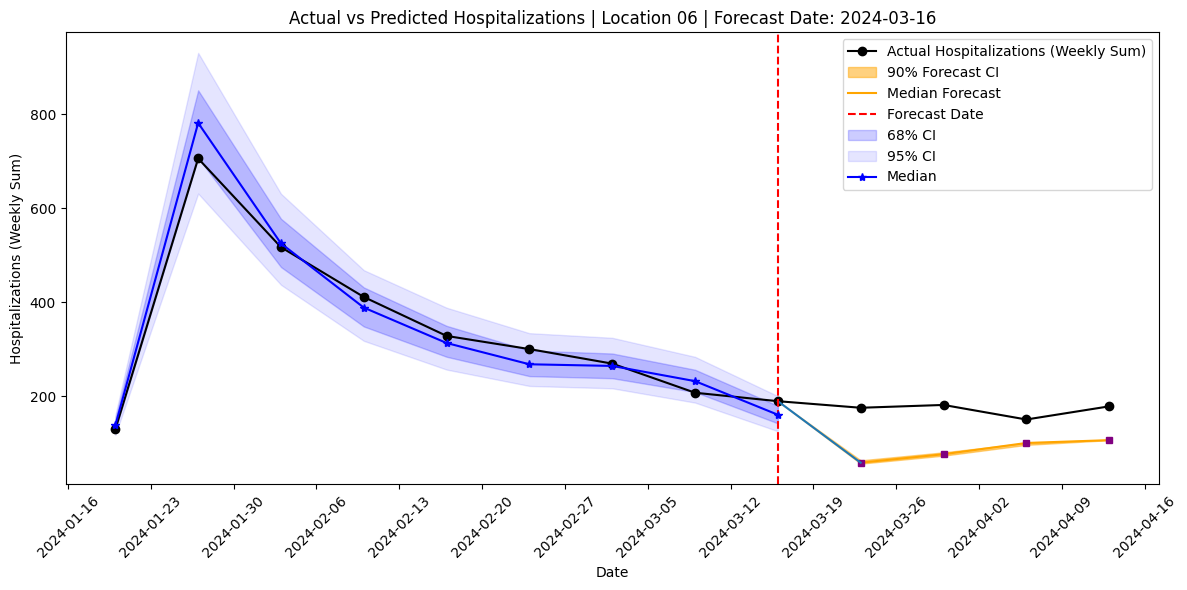

2024-03-23
2024-03-23


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

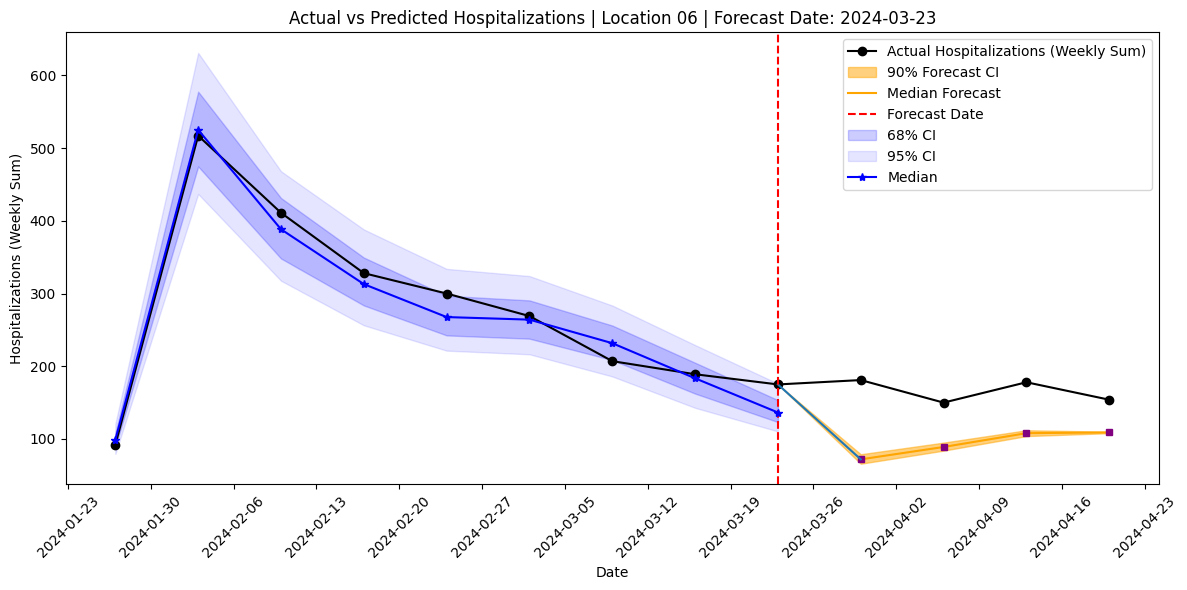

2024-03-30
2024-03-30


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

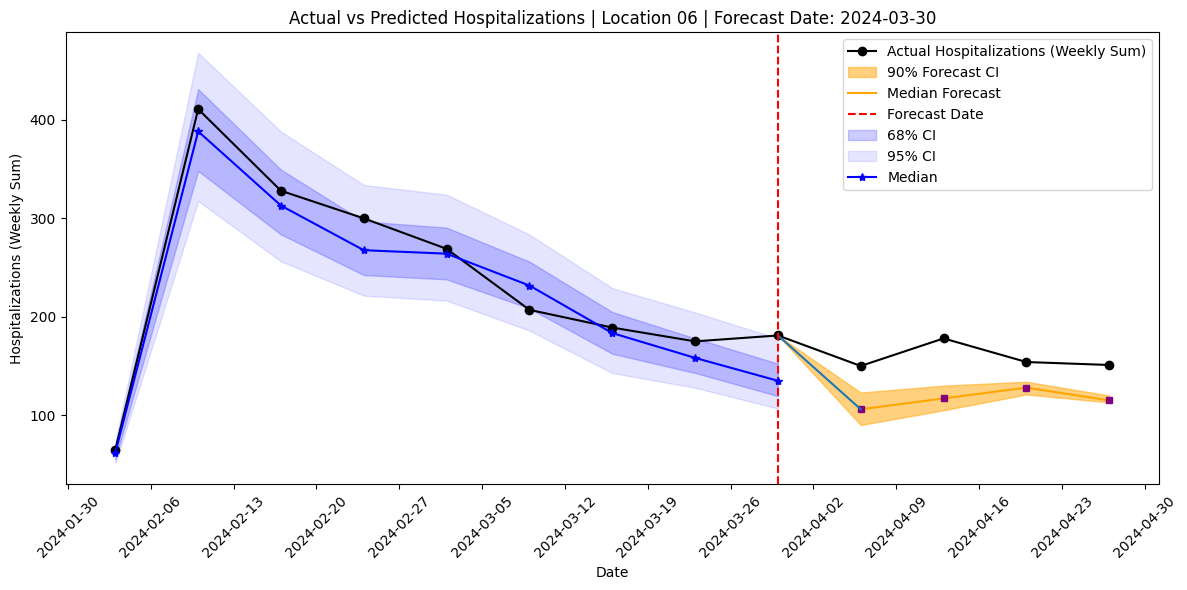

2024-04-06
2024-04-06


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

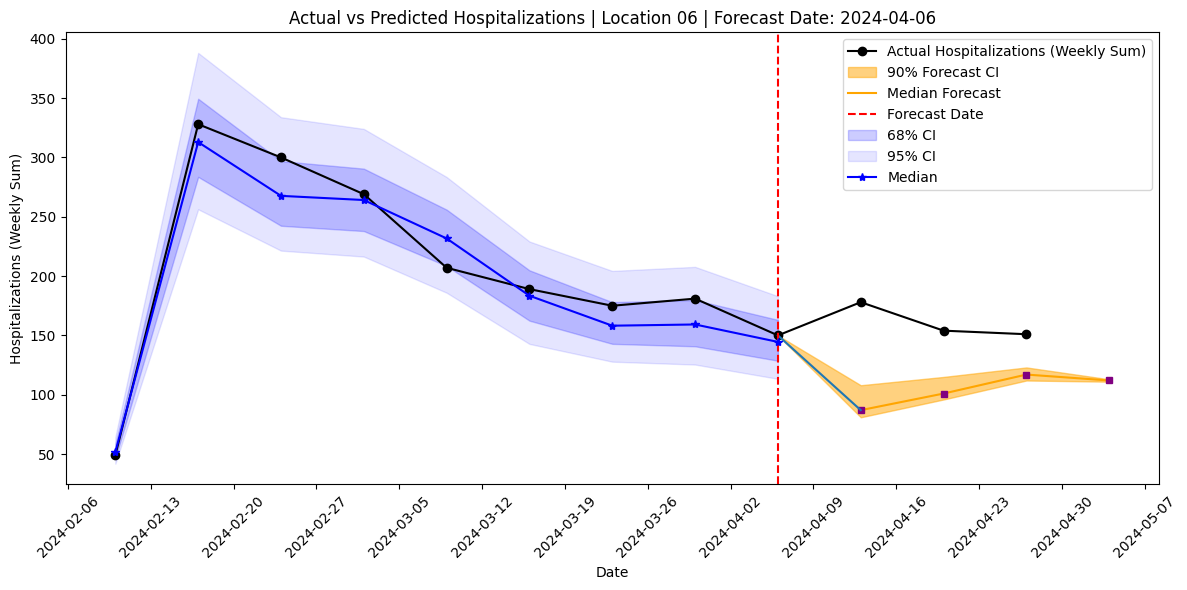

2024-04-13
2024-04-13


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

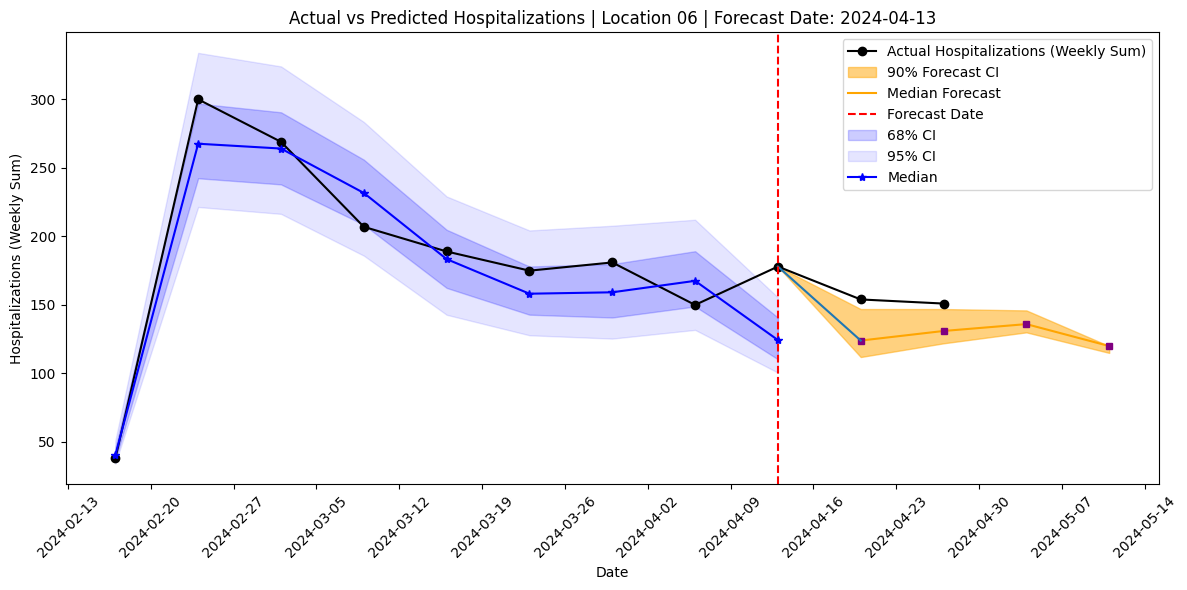

2024-04-20
2024-04-20


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

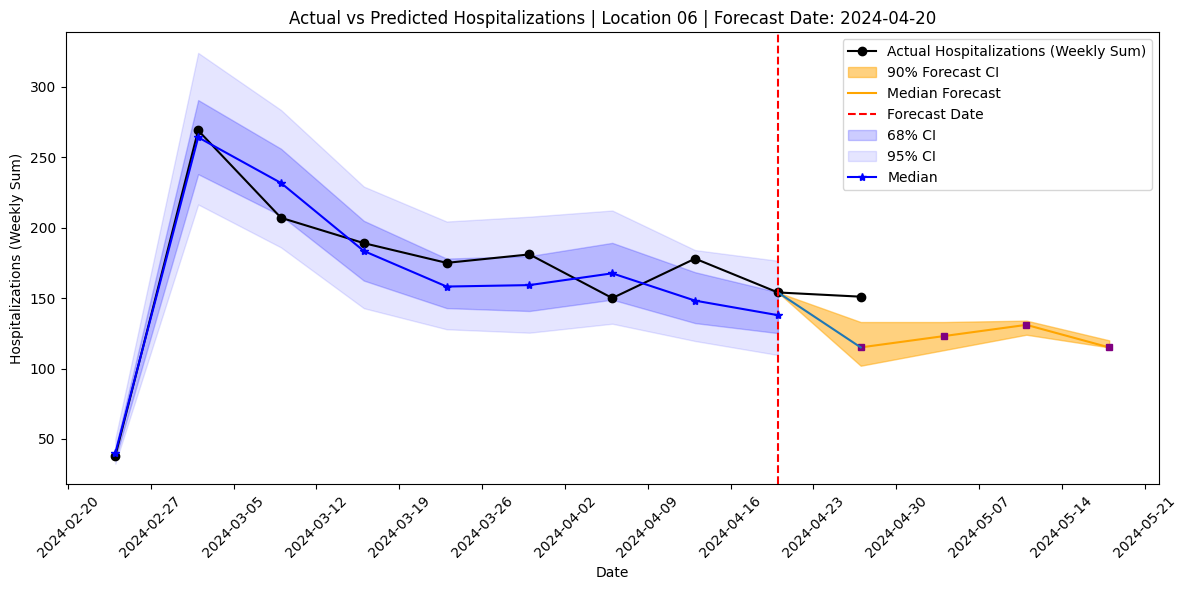

2024-04-27
2024-04-27


/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_quantile_data.loc[4] = new_row
/home/andrew/PycharmProjects/pmcmc_forecast/src/utils/plotting.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

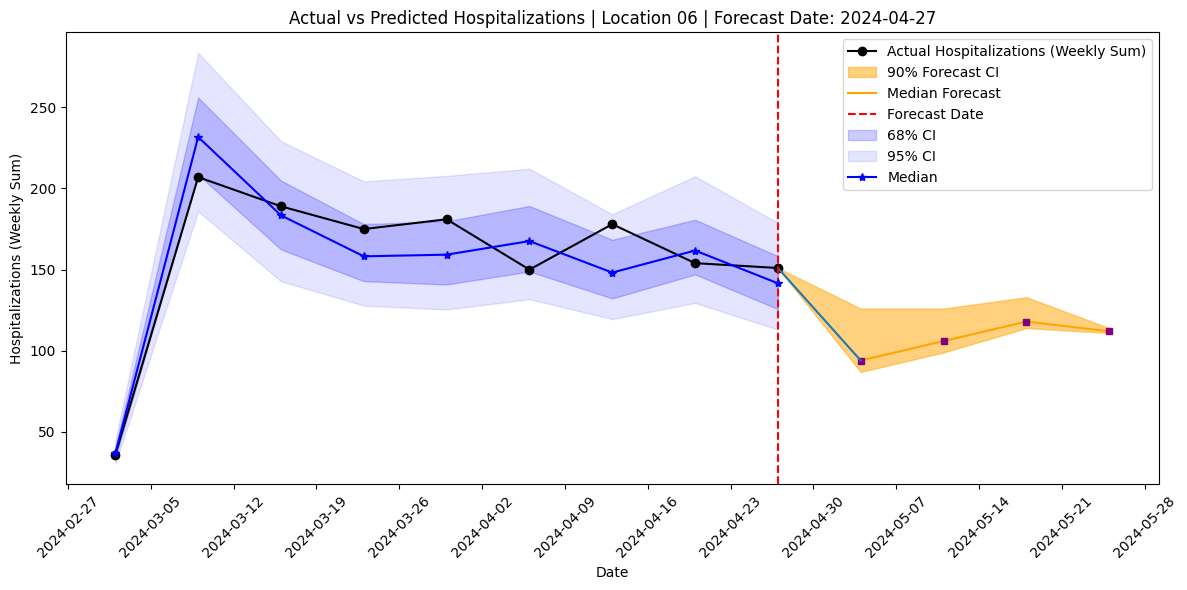

test_predictions_20241006
test_predictions_20241006


In [22]:
directory = os.path.join(paths.OUTPUT_DIR, "hosp_forecast")

for subdir in os.listdir(directory):
    print(subdir)
    full_path = os.path.join(directory, subdir)
    if os.path.isdir(full_path):
        date = str(subdir)
        print(date)
    else:
        continue
    try:
        plot_predictions_with_quantile_range(
            prediction_date=date,
            location="06",
            hosp_est_file_name="mle_hosp_est_20241020.npy",
            weeks_prior=8,
            daily_resolution=False,
            pf_uncertainty=True,
            streamlit=False,
        )
    except:
        continue